<a href="https://colab.research.google.com/github/mfilipak/BXBRASIL2025/blob/main/BX_BRASIL_HANDS_ON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COLAB NOTEBOOK DO EVENTO BX-BRASIL

# 1 - USANDO A API NOTA CERTA.

In [2]:
import requests

url = "https://afrac-ncm-demo.hf.space/api/predict"

payload = {
    "data": ["Coca-Cola PET 2l"]
}

headers = {
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)
result = response.json()

import pprint
pprint.pprint(result)

{'average_duration': 0.06768654330863252,
 'data': [{'confidences': [{'confidence': 0.5184096693992615,
                            'label': '22021000'},
                           {'confidence': 0.03791089728474617,
                            'label': '22011000'},
                           {'confidence': 0.03218604251742363,
                            'label': '22030000'},
                           {'confidence': 0.02866430953145027,
                            'label': '21069090'},
                           {'confidence': 0.02776830829679966,
                            'label': '22029900'}],
           'label': '22021000'},
          'Bebidas, líquidos alcoólicos e vinagres.Águas, incluindo as águas '
          'minerais e as águas gaseificadas, adicionadas de açúcar ou de '
          'outros edulcorantes ou aromatizadas e outras bebidas não '
          'alcoólicas, exceto sucos (sumos) de fruta ou de produtos hortícolas '
          'da posição 20.09.- Águas, incluindo as águas

# 2 - EXEMPLO PRÁTICO DE USO DE I.A NA GERAÇÃO DE CÓDIGO / DEBUG

Em https://huggingface.co/spaces/AFRAC/NCM_DEMO você encontrará no rodapé da WebApp como interagir com a API. A sugestão padrão do Huggingface é essa aí abaixo.
Como ocorreu um erro, eu conversei com o Gemini integrado ao COLAB (pelo menos é o que está integrado em fevereiro de 2025).

In [3]:
from gradio_client import Client

client = Client("https://afrac-ncm-demo.hf.space/")
result = client.predict(
				"Howdy!",	# str representing string value in 'DESCRIÇÃO' Textbox component
				api_name="/predict"
)
print(result)

ModuleNotFoundError: No module named 'gradio_client'

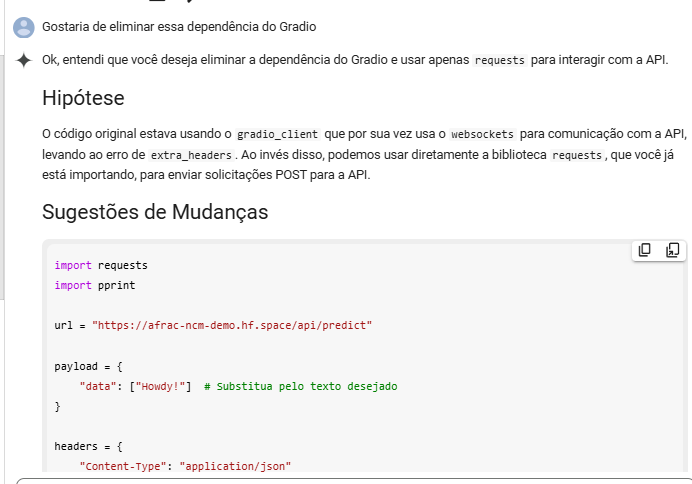

In [ ]:
#Basicamente o mesmo código usado anteriormente.
import requests
import pprint

url = "https://afrac-ncm-demo.hf.space/api/predict"

payload = {
    "data": ["Howdy!"]  # Substitua pelo texto desejado
}

headers = {
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)
result = response.json()

pprint.pprint(result)

{'average_duration': 0.0676882606055709,
 'data': [{'confidences': [{'confidence': 0.41126593947410583,
                            'label': '49019900'},
                           {'confidence': 0.06514250487089157,
                            'label': '21069090'},
                           {'confidence': 0.05665813386440277,
                            'label': '49029000'},
                           {'confidence': 0.023258838802576065,
                            'label': '19059090'},
                           {'confidence': 0.021930279210209846,
                            'label': '49011000'}],
           'label': '49019900'},
          'Livros, jornais, gravuras e outros produtos das indústrias '
          'gráficas; textos manuscritos ou datilografados, planos e '
          'plantas.Livros, brochuras e impressos semelhantes, mesmo em folhas '
          'soltas.- Outros:-- Outros'],
 'duration': 0.0708160400390625,
 'is_generating': False}


# 3 - Rodando um modelo localmente

In [56]:
#Os comentários foram gerados pelo Gemini


import tensorflow as tf         # TensorFlow para aprendizado de máquina.
import os                       # Funções para interagir com o sistema operacional.
import pandas as pd             # Pandas para manipulação e análise de dados.
import numpy as np              # NumPy para computação numérica com arrays.
from sklearn.preprocessing import OneHotEncoder  # OneHotEncoder para codificação one-hot.
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizer para tokenizar texto.
import time                     # Funções relacionadas ao tempo.

In [38]:
if os.path.exists('NCM_DEMO.h5'):
  model = tf.keras.models.load_model('NCM_DEMO.h5', compile=False)
else:
  print('O arquivo NCM_DEMO.H5 não foi encontrado na pasta corrente. Baixe o arquivo e tente novamente')

In [33]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 120, 106)            │          11,342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 114, 128)            │          95,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 114, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 57, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 51, 256)             │         229,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 51, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 25, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 19, 512)             │         918,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 19, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 9, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 7, 512)              │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 5, 512)              │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 5, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 3, 512)              │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 3, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 1, 512)              │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,498,978 (28.61 MB)

 Trainable params: 7,498,978 (28.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Carrega a tabela NCM de um arquivo CSV do GitHub, definindo "CODIGO" como índice.
ncm_table = pd.read_csv("https://raw.githubusercontent.com/mfilipak/AFRAC_IA/main/DATASET/TABELA_NCM.CSV", index_col="CODIGO")

# Filtra os NCMs válidos (maiores que 1.000.000) e os ordena.
valid_ncms = sorted(ncm_table[ncm_table.index > 1000000].index)

# Converte a lista de NCMs válidos em um array NumPy.
ncmst = np.array(valid_ncms)
# Remodela o array para ter uma única coluna.
ncmst = ncmst.reshape([-1,1])

# Cria um objeto OneHotEncoder para codificação one-hot.
ohe = OneHotEncoder()
# Ajusta o OneHotEncoder aos dados de NCM.
ohe.fit(ncmst)

# Cria um objeto Tokenizer para tokenizar texto em nível de caractere.
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
# Define o dicionário word_index do Tokenizer com tokens e seus índices.
tk.word_index = {'UNK': 1, ' ': 2, 'a': 3, 'o': 4, 'e': 5, 'r': 6, 'i': 7, 'c': 8, 'l': 9, 's': 10, 't': 11, 'n': 12, 'm': 13, '0': 14, 'p': 15, 'g': 16, 'd': 17, 'u': 18, 'b': 19, '1': 20, 'f': 21, 'h': 22, '2': 23, '5': 24, 'v': 25, '3': 26, 'k': 27, '4': 28, '.': 29, 'x': 30, '6': 31, '8': 32, '-': 33, '7': 34, '9': 35, 'j': 36, 'z': 37, '/': 38, 'y': 39, 'q': 40, 'w': 41, ',': 42, ':': 43, '(': 44, ')': 45, '_': 46, '#': 47, '+': 48, '*': 49, '%': 50, '"': 51, "'": 52, 'ç': 53, '&': 54, 'ã': 55, ';': 56, ']': 57, '[': 58, '$': 59, 'á': 60, '\\': 61, '|': 62, 'é': 63, 'º': 64, 'ó': 65, '!': 66, '=': 67, 'í': 68, 'ê': 69, '?': 70, '>': 71, '@': 72, '¿': 73, '°': 74, 'ú': 75, '\xa0': 76, 'ô': 77, 'â': 78, '`': 79, 'à': 80, 'õ': 81, 'ï': 82, 'ª': 83, '²': 84, '{': 85, '<': 86, '~': 87, 'è': 88, '§': 89, 'ø': 90, 'ñ': 91, '³': 92, 'û': 93, 'ù': 94, '\xad': 95, '}': 96, '\x81': 97, 'ä': 98, 'ü': 99, '¶': 100, '^': 101, '€

In [64]:
print(len(ncmst))
ncmst

11284


array([[ 1006109],
       [ 1006301],
       [ 1006302],
       ...,
       [97053900],
       [97061000],
       [97069000]])

In [43]:
def PredictNCM(txt):
    x = [txt[:120].lower() ]

    #print(txt)

    X = np.array(tk.texts_to_sequences([_+(120-len(_))*" " for _ in x]))
    pred = model.predict(X, verbose=0)[0]
    aux = np.argsort(pred)[::-1][:5]
    return {f"{int(valid_ncms[i]):08}":float(pred[i]) for i in aux}, ncm_table.loc[valid_ncms[aux[0]],"DESCRICAO"]


In [78]:
pprint.pprint(PredictNCM("Coca-Cola"))

({'21069010': 0.03279051184654236,
  '21069090': 0.07082244008779526,
  '22011000': 0.06617753207683563,
  '22021000': 0.4794245958328247,
  '22030000': 0.04007643461227417},
 'Bebidas, líquidos alcoólicos e vinagres.Águas, incluindo as águas minerais e '
 'as águas gaseificadas, adicionadas de açúcar ou de outros edulcorantes ou '
 'aromatizadas e outras bebidas não alcoólicas, exceto sucos (sumos) de fruta '
 'ou de produtos hortícolas da posição 20.09.- Águas, incluindo as águas '
 'minerais e as águas gaseificadas, adicionadas de açúcar ou de outros '
 'edulcorantes ou aromatizadas')


In [79]:
#Rodando de 1 em 1
before = time.time()
PredictNCM("Coca-Cola")
print(f"{time.time()-before:.03}s por item.")

0.0858s por Coca-Cola


In [49]:
txt = "Coca-Cola"
x = [txt[:120].lower() ]
X = np.array(tk.texts_to_sequences([_+(120-len(_))*" " for _ in x]*1000)) #Estamos gerando 1000 "Coca-Cola"

In [81]:
before = time.time()
model.predict(X, verbose=0)
print(f"{(time.time()-before)/1000:.03}s por item. Rodando em batch de 1000.")

0.00261s por item. Rodando em batch de 1000.


array([[2.5863725e-10, 2.5655503e-10, 2.5604172e-10],
       [2.5863728e-10, 2.5655505e-10, 2.5604177e-10],
       [2.5863725e-10, 2.5655503e-10, 2.5604172e-10],
       ...,
       [2.5863728e-10, 2.5655505e-10, 2.5604177e-10],
       [2.5863950e-10, 2.5655336e-10, 2.5604105e-10],
       [2.5863953e-10, 2.5655339e-10, 2.5604108e-10]], dtype=float32)